In [1]:
import networkx as nx
import pandas as pd
import numpy as np

from random import random, choice

In [2]:
# for visualization
from IPython.display import SVG 
from sknetwork.visualization import svg_graph 
from sknetwork.data import Bunch 
from sknetwork.ranking import PageRank 
from scipy.sparse import csr_matrix

def draw_graph(G, show_names=False, node_size=1, font_size=10, edge_width=0.5):

    adjacency = nx.to_scipy_sparse_array(G, nodelist=None, dtype=None, weight='weight', format='csr')
    adjacency = csr_matrix(adjacency) # fix to weird sknetwork-csr issue; comment out to troubleshoot
    
    names = np.array(list(G.nodes))
    
    graph = Bunch()
    graph.adjacency = adjacency
    graph.names = np.array(names)
    
    pagerank = PageRank()
    scores = pagerank.fit_transform(adjacency)

    if show_names:
        
        image = svg_graph(graph.adjacency, font_size=font_size, node_size=node_size, names=graph.names, width=700, height=500, scores=scores, edge_width=edge_width)
    
    else:
        
        image = svg_graph(graph.adjacency, node_size=node_size, width=700, height=500, scores = scores, edge_width=edge_width)
    
    return SVG(image)

In [29]:
def choose_to_connect():

    random_threshold = random() * 8 # make it more rare
    random_value = random()

    return random_value > random_threshold

In [30]:
def show_degree_distribution(G):

    degrees = [degree for node, degree in G.degree()]

    return pd.Series(degrees).plot.hist(bins=10)

In [34]:
votes = []

for i in range(20):
    votes.append(choose_to_connect())
    
pd.Series(votes).value_counts().sort_index()

False    18
True      2
Name: count, dtype: int64

In [54]:
def create_random_network_edgelist(node_count=50, iterations=10):

    edgelist = []

    nodes = [i for i in range(node_count)]

    for i in range(iterations):

        for node in nodes:
            
            source = node

            if choose_to_connect(): # choose to connect or not
                
                target = choice(nodes) # choose a random node to connect to
                
            else:
                
                target = source

            edgelist.append((source, target))

    df = pd.DataFrame(edgelist)
    df.columns = ['source', 'target']
    
    return df

In [61]:
iterations = 50
node_count = 100

df = create_random_network_edgelist(node_count, iterations)

G = nx.from_pandas_edgelist(df)

print(G)

Graph with 100 nodes and 414 edges


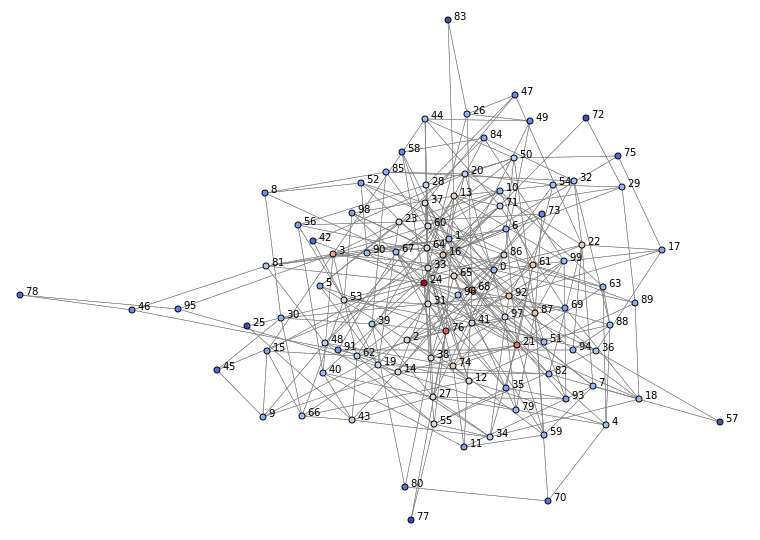

In [62]:
draw_graph(G, node_size=3, show_names=True)

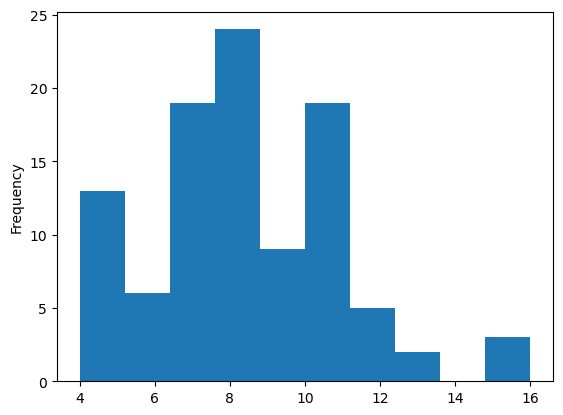

In [63]:
_= show_degree_distribution(G)

In [64]:
page_rank = nx.pagerank(G)

pr_df = pd.DataFrame().from_dict(page_rank, orient='index')
pr_df.columns = ['page_rank']
pr_df.sort_values('page_rank', ascending=False, inplace=True)
pr_df.head(10)

,page_rank
24,0.019349
76,0.017733
21,0.017110
68,0.015605
3,0.015565
16,0.014514
92,0.014295
87,0.014279
61,0.013944
74,0.013694


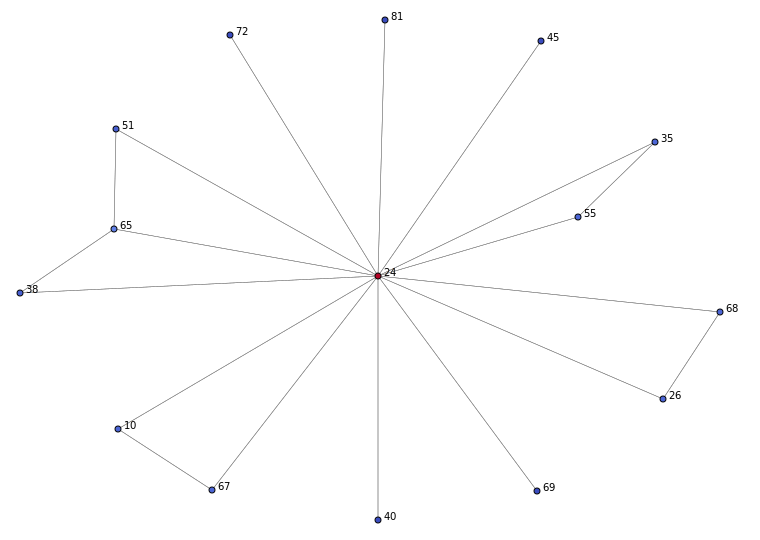

In [66]:
ego = nx.ego_graph(G, 24)

draw_graph(ego, show_names=True, node_size=3)